In [19]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [20]:
dataset = pd.read_csv("../data/processed/dataset_mylabels_2020.csv")

normal_accounts = dataset[dataset.my_labels == 0]
professional_accounts = dataset[dataset.my_labels == 1]
unknow_accounts = dataset[dataset.my_labels == -1]

colunas = ['balance_ether', 'total_transactions', 'sent', 'received', 'n_contracts_sent', 'n_contracts_received']

In [21]:
normal_accounts[colunas].describe()

,balance_ether,total_transactions,sent,received,n_contracts_sent,n_contracts_received
count,16576.000000,16576.000000,16576.000000,16576.000000,16576.000000,16576.000000
mean,1.928057,1578.961269,1.863598,37.128077,30.067507,0.077280
std,26.883785,5857.214611,21.887259,126.220369,111.334039,2.764022
min,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
25%,0.000000,7.000000,0.000000,1.000000,0.000000,0.000000
50%,0.000328,28.000000,0.000000,2.000000,1.000000,0.000000
75%,0.007192,282.250000,0.000000,6.000000,3.000000,0.000000
max,1263.964030,86525.000000,1395.000000,1754.000000,1429.000000,266.000000


In [22]:
professional_accounts[colunas].describe()

,balance_ether,total_transactions,sent,received,n_contracts_sent,n_contracts_received
count,142.000000,1.420000e+02,142.000000,142.000000,142.000000,142.000000
mean,5562.606168,1.086769e+06,769.683099,3581.225352,1612.626761,0.211268
std,24790.972282,3.048129e+06,2230.221693,7378.350770,4164.672793,2.031074
min,0.000000,3.800000e+01,0.000000,1.000000,0.000000,0.000000
25%,2.200174,4.615025e+04,0.000000,245.500000,0.000000,0.000000
50%,92.682540,2.382030e+05,4.500000,959.500000,76.000000,0.000000
75%,642.544348,8.969975e+05,349.000000,3614.500000,932.250000,0.000000
max,253345.733167,2.725300e+07,17400.000000,59352.000000,37596.000000,24.000000


In [23]:
unknow_accounts[colunas].describe()

,balance_ether,total_transactions,sent,received,n_contracts_sent,n_contracts_received
count,302.000000,3.020000e+02,302.000000,302.000000,302.000000,302.000000
mean,276.388464,1.741665e+05,274.096026,2877.000000,2097.668874,9.254967
std,1087.603330,2.036868e+05,1076.535702,4308.378486,3962.910768,115.343707
min,0.000000,6.000000e+01,0.000000,2.000000,0.000000,0.000000
25%,0.005464,6.126050e+04,0.000000,943.000000,37.000000,0.000000
50%,2.048618,1.106490e+05,1.000000,1729.500000,1216.500000,0.000000
75%,25.526910,2.088638e+05,48.500000,3202.500000,2204.250000,0.000000
max,12158.310847,2.103389e+06,14929.000000,49728.000000,48939.000000,1940.000000


In [24]:
def plot_boxplot_dataset(columns_list, data):
    labels = ["Unknown", 'Normal Accounts', 'Professional']
    for column in columns_list:
        plt.figure(figsize =(11, 6))

        sns.set_style("whitegrid")

        #Plotando o boxplot das espécies em relação ao tamanho das sépalas
        ax = sns.boxplot(x = "my_labels", y =column,data = data, hue="my_labels", 
                        order=[0, 1, -1])

        # Adicionando Título ao gráfico
        ax.set_yscale("log")
        plt.title(f"Boxplot {column}", loc="center", fontsize=18)
        plt.ylabel(f"{column}")
        plt.xlabel("Grupos")

        h, l = ax.get_legend_handles_labels()
        ax.legend(h, labels, title="Account type")        
        #plt.legend(title='Accounts', loc='best', labels=labels)

        plt.show(ax)
        plt.close()

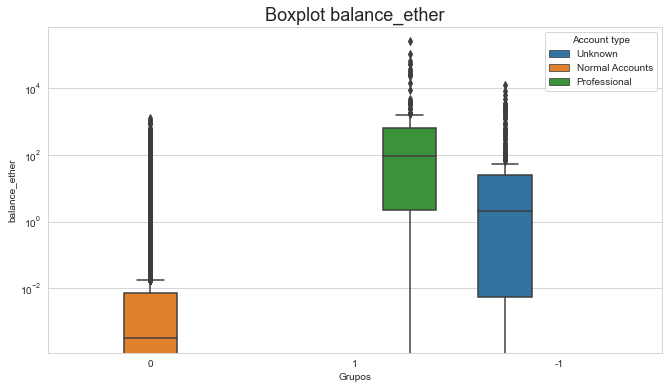

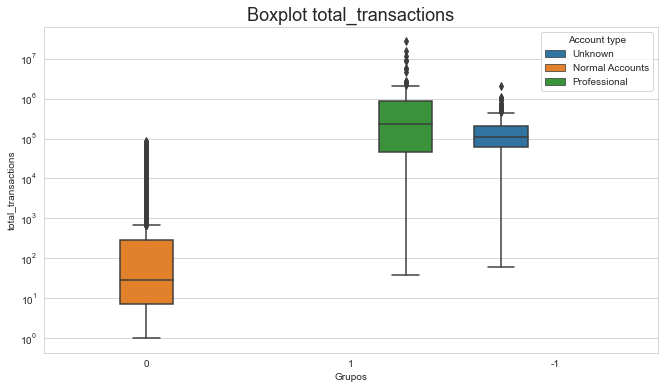

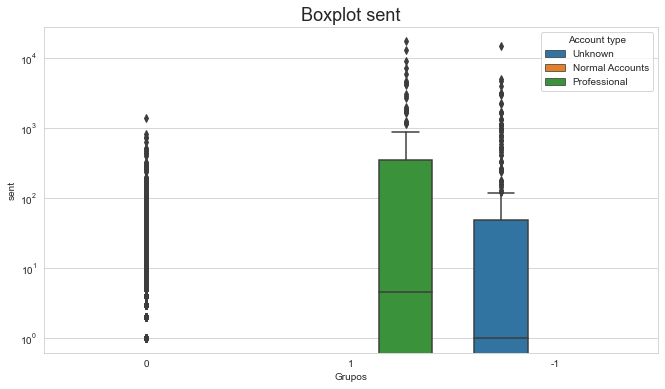

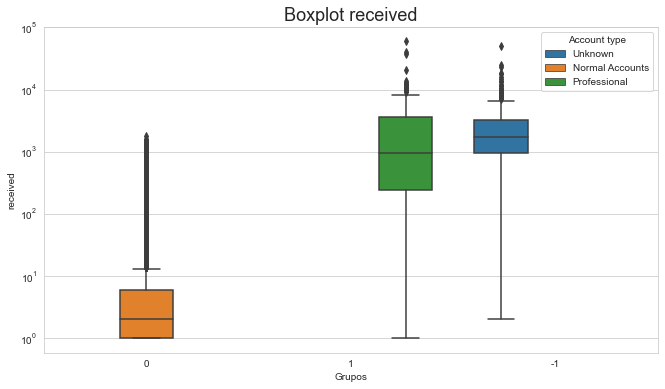

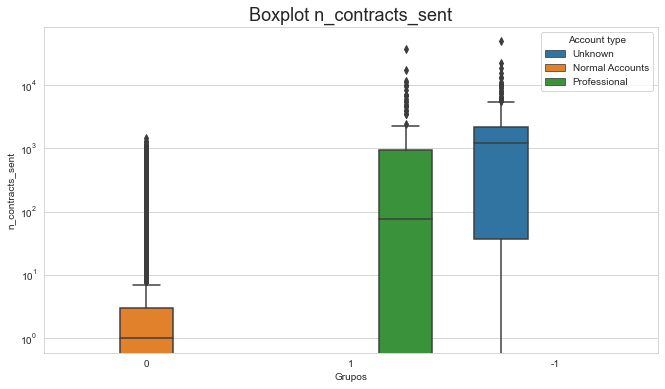

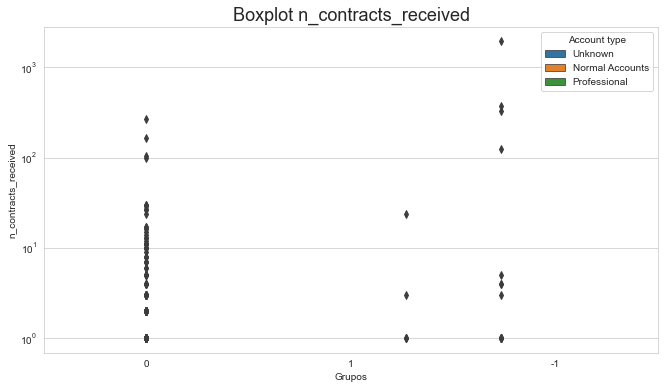

In [25]:
plot_boxplot_dataset(colunas, dataset)

In [26]:
data_labels_semi = pd.read_csv("../reports/semi_supervised_results.csv")
labels_semi = data_labels_semi["Decision Tree"].values


unknow_accounts["labels_semi_supervised"] = labels_semi
unknow_accounts

/tmp/ipykernel_102945/1338489421.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unknow_accounts["labels_semi_supervised"] = labels_semi


,user_account,balance_ether,balance_value,total_transactions,sent,received,n_contracts_sent,n_contracts_received,classification,labels,my_labels,labels_semi_supervised
28,0xf71cbf6758aaaaf06ebcca5447019c31bb145782,0.006900,2.70,139851,1,3059,0,0,0,No label,-1,1
65,0xb50f22bbfa23fbb730e601f1a866495bff588ca3,0.000236,0.09,105004,0,1735,1735,0,0,No label,-1,1
68,0xfdf1946a9b40245224488f1a36f4a9ed4844a523,5.395329,2110.01,317384,1,8898,8898,0,0,No label,-1,1
76,0x1f487a4435f3b730d742aa4b6ef8c9e0a6b9a027,1.061512,415.14,298850,0,4356,4356,0,0,No label,-1,1
77,0x698103f9e5e97fd3f069cad52762363e9fd80a4b,590.380747,230886.10,141029,132,5452,5169,0,0,No label,-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
15224,0xf61c76227337c0c6ddf06ff74682c268b8ec02e9,0.000000,0.00,36687,3,3193,3193,0,0,No label,-1,1
15365,0x78487c297d6db56a749b5736162b6063ebca41f1,9.347658,3604.27,53922,537,1991,10,0,0,No label,-1,1
15445,0xc6bd3edd07e294cb66b8318356d688b3516ea950,185.009187,71230.39,632171,123,4112,4092,0,0,No label,-1,1
15903,0xecdebcbbe1563b560234ac554bc0e29f4c070118,0.000054,0.02,55701,2,6209,6209,0,0,No label,-1,1


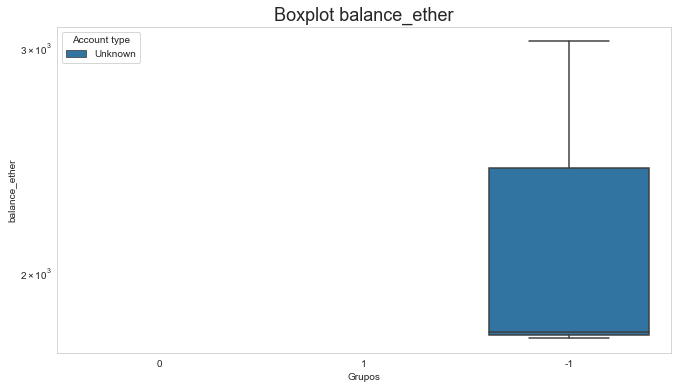

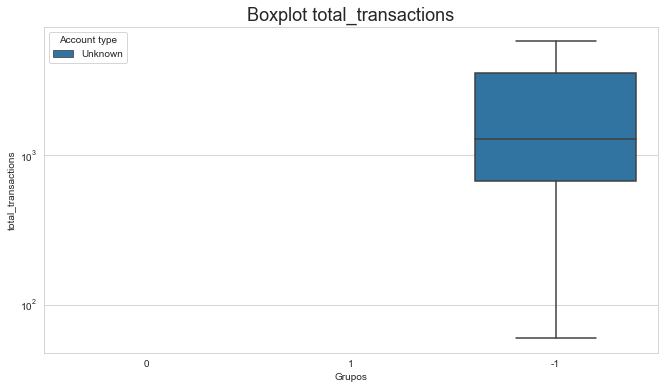

/tmp/ipykernel_102945/960406414.py:13: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  ax.set_yscale("log")


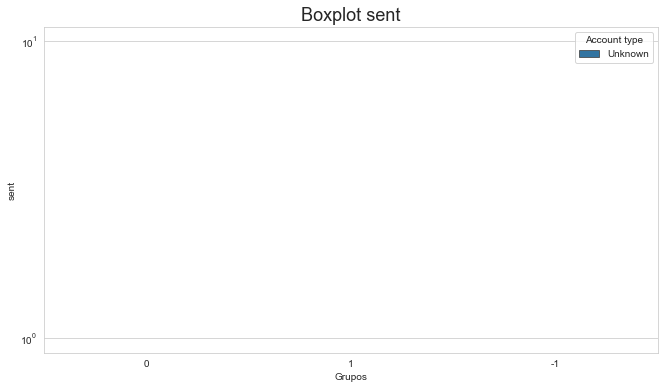

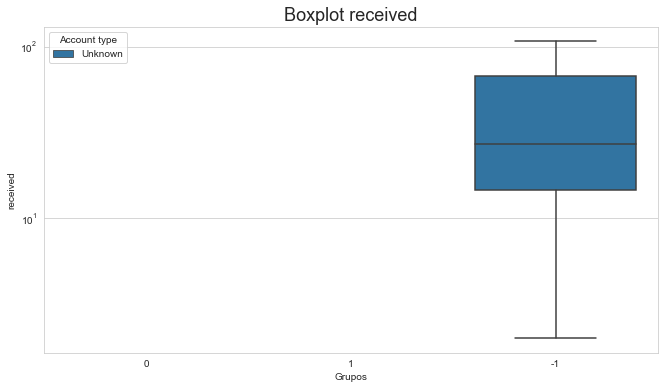

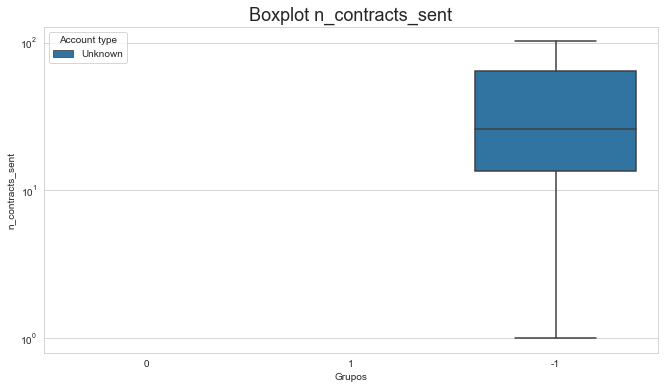

/tmp/ipykernel_102945/960406414.py:13: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  ax.set_yscale("log")


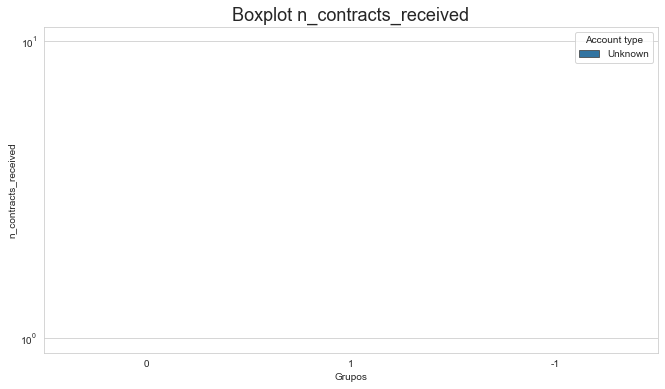

In [27]:
plot_boxplot_dataset(colunas, unknow_accounts[unknow_accounts.labels_semi_supervised == 0])

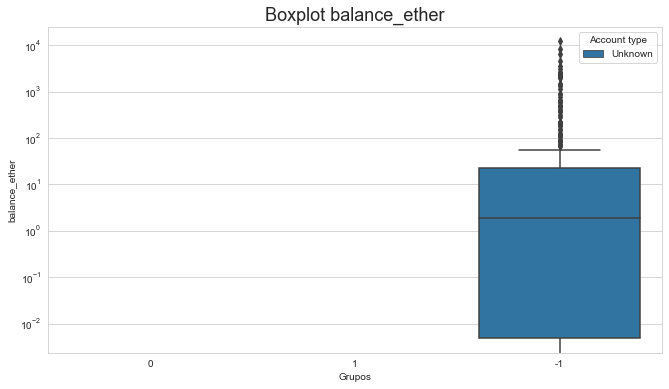

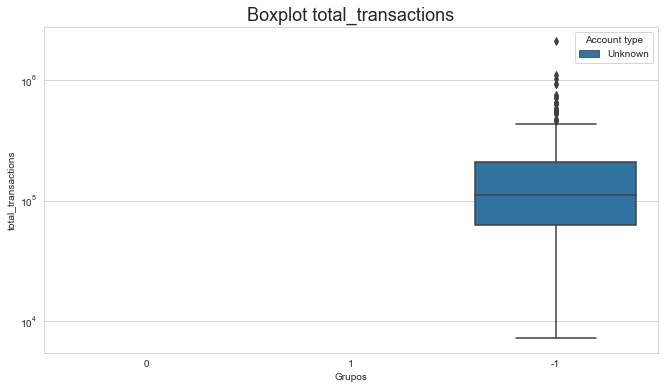

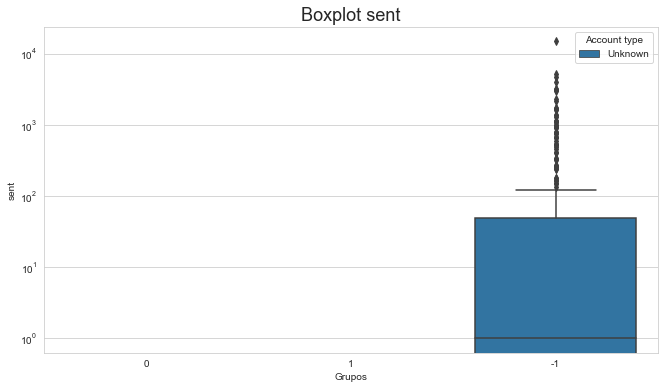

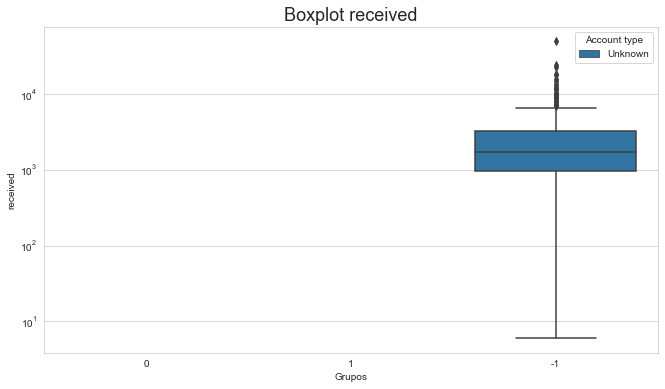

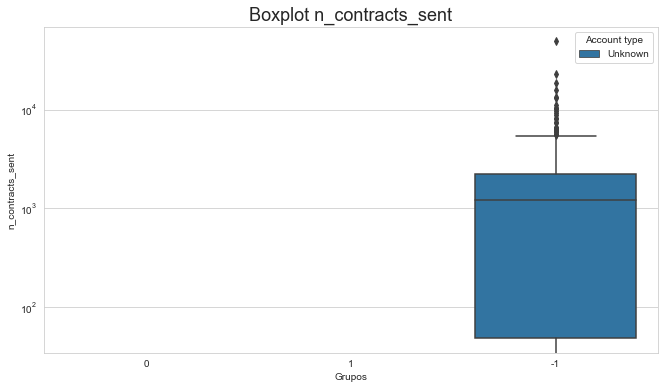

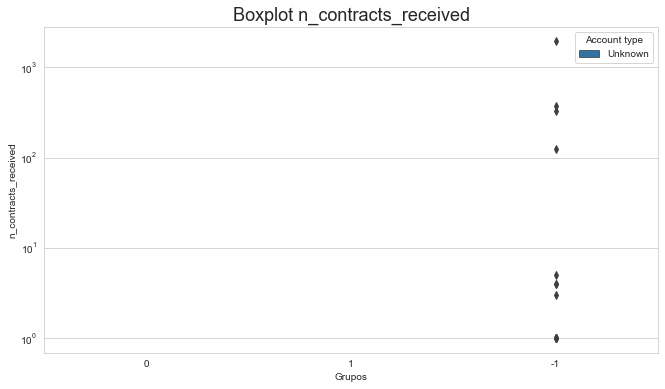

In [28]:
plot_boxplot_dataset(colunas, unknow_accounts[unknow_accounts.labels_semi_supervised == 1])

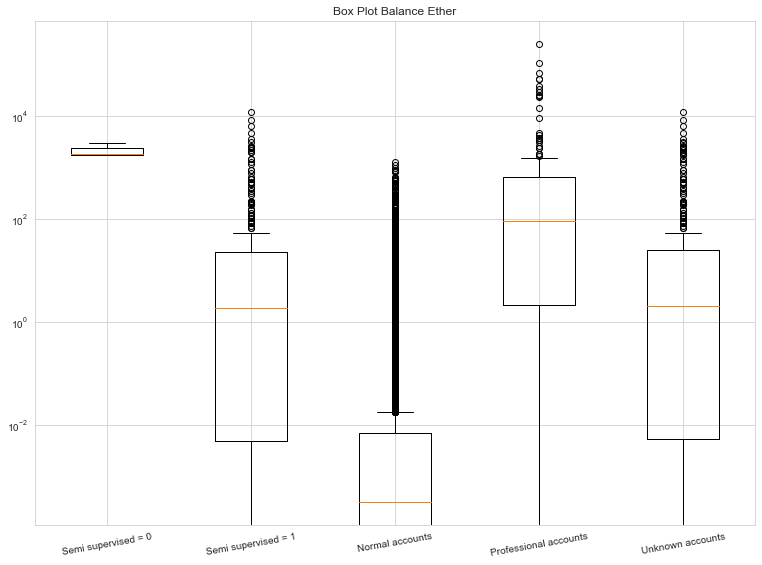

In [36]:
data0 = unknow_accounts[unknow_accounts.labels_semi_supervised == 0].balance_ether
data1 = unknow_accounts[unknow_accounts.labels_semi_supervised == 1].balance_ether
data2 = dataset[dataset.my_labels == 0].balance_ether
data3 = dataset[dataset.my_labels == 1].balance_ether
data4 = dataset[dataset.my_labels == -1].balance_ether


dados = [data0, data1, data2, data3, data4]

fig = plt.figure(figsize =(10, 7))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
 
# Creating plot
bp = ax.boxplot(dados)
ax.set_yscale("log")
plt.title("Box Plot Balance Ether")
plt.xticks([1, 2, 3, 4, 5], ["Semi supervised = 0", "Semi supervised = 1", "Normal accounts", "Professional accounts", "Unknown accounts"], rotation=10)
 
# show plot
plt.show()

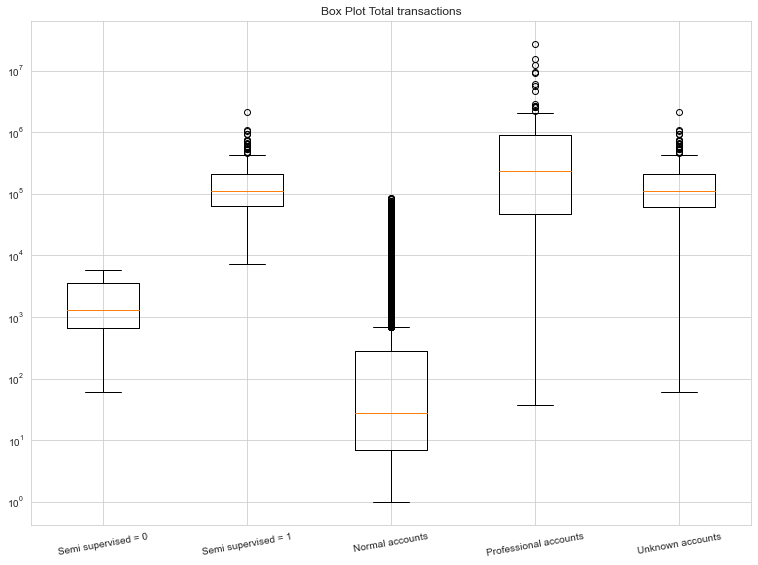

In [37]:
data0 = unknow_accounts[unknow_accounts.labels_semi_supervised == 0].total_transactions
data1 = unknow_accounts[unknow_accounts.labels_semi_supervised == 1].total_transactions
data2 = dataset[dataset.my_labels == 0].total_transactions
data3 = dataset[dataset.my_labels == 1].total_transactions
data4 = dataset[dataset.my_labels == -1].total_transactions


dados = [data0, data1, data2, data3, data4]

fig = plt.figure(figsize =(10, 7))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
 
# Creating plot
bp = ax.boxplot(dados)
ax.set_yscale("log")
plt.title("Box Plot Total transactions")
plt.xticks([1, 2, 3, 4, 5], ["Semi supervised = 0", "Semi supervised = 1", "Normal accounts", "Professional accounts", "Unknown accounts"], rotation=10)
 
# show plot
plt.show()

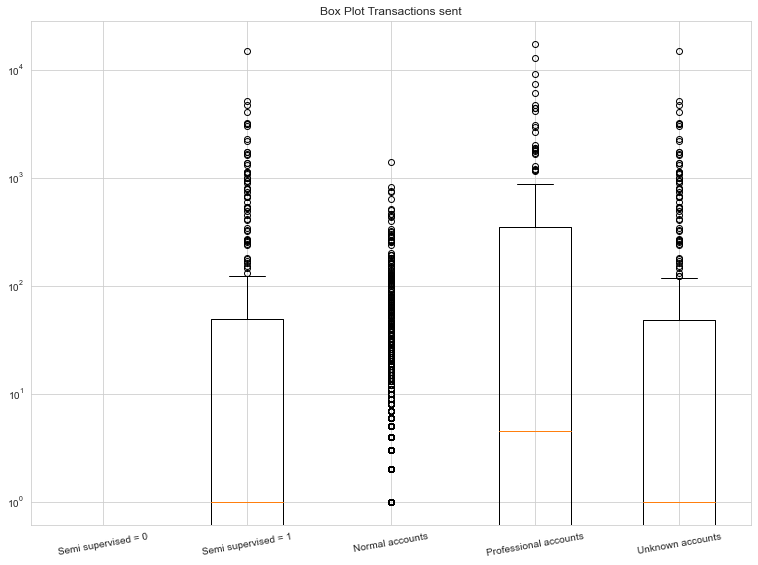

In [39]:
data0 = unknow_accounts[unknow_accounts.labels_semi_supervised == 0].sent
data1 = unknow_accounts[unknow_accounts.labels_semi_supervised == 1].sent
data2 = dataset[dataset.my_labels == 0].sent
data3 = dataset[dataset.my_labels == 1].sent
data4 = dataset[dataset.my_labels == -1].sent


dados = [data0, data1, data2, data3, data4]

fig = plt.figure(figsize =(10, 7))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
 
# Creating plot
bp = ax.boxplot(dados)
ax.set_yscale("log")
plt.title("Box Plot Transactions sent")
plt.xticks([1, 2, 3, 4, 5], ["Semi supervised = 0", "Semi supervised = 1", "Normal accounts", "Professional accounts", "Unknown accounts"], rotation=10)
 
# show plot
plt.show()

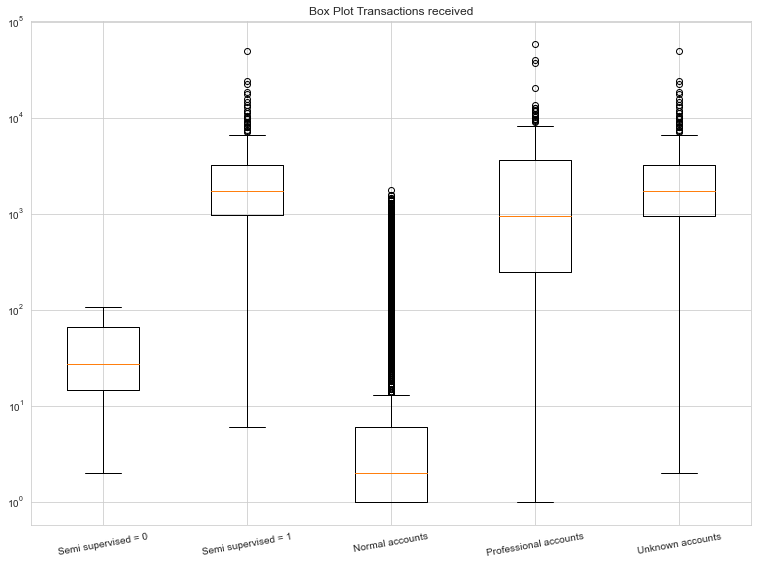

In [40]:
data0 = unknow_accounts[unknow_accounts.labels_semi_supervised == 0].received
data1 = unknow_accounts[unknow_accounts.labels_semi_supervised == 1].received
data2 = dataset[dataset.my_labels == 0].received
data3 = dataset[dataset.my_labels == 1].received
data4 = dataset[dataset.my_labels == -1].received


dados = [data0, data1, data2, data3, data4]

fig = plt.figure(figsize =(10, 7))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
 
# Creating plot
bp = ax.boxplot(dados)
ax.set_yscale("log")
plt.title("Box Plot Transactions received")
plt.xticks([1, 2, 3, 4, 5], ["Semi supervised = 0", "Semi supervised = 1", "Normal accounts", "Professional accounts", "Unknown accounts"], rotation=10)
 
# show plot
plt.show()

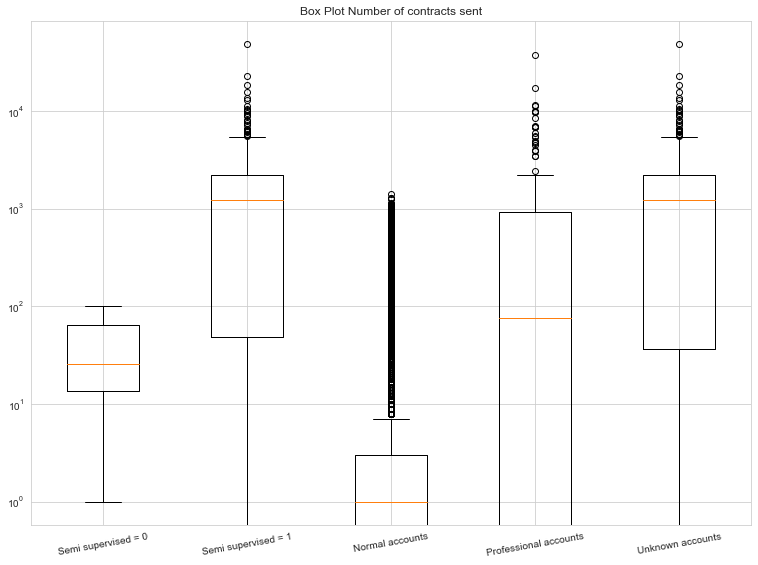

In [41]:
data0 = unknow_accounts[unknow_accounts.labels_semi_supervised == 0].n_contracts_sent
data1 = unknow_accounts[unknow_accounts.labels_semi_supervised == 1].n_contracts_sent
data2 = dataset[dataset.my_labels == 0].n_contracts_sent
data3 = dataset[dataset.my_labels == 1].n_contracts_sent
data4 = dataset[dataset.my_labels == -1].n_contracts_sent


dados = [data0, data1, data2, data3, data4]

fig = plt.figure(figsize =(10, 7))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
 
# Creating plot
bp = ax.boxplot(dados)
ax.set_yscale("log")
plt.title("Box Plot Number of contracts sent")
plt.xticks([1, 2, 3, 4, 5], ["Semi supervised = 0", "Semi supervised = 1", "Normal accounts", "Professional accounts", "Unknown accounts"], rotation=10)
 
# show plot
plt.show()

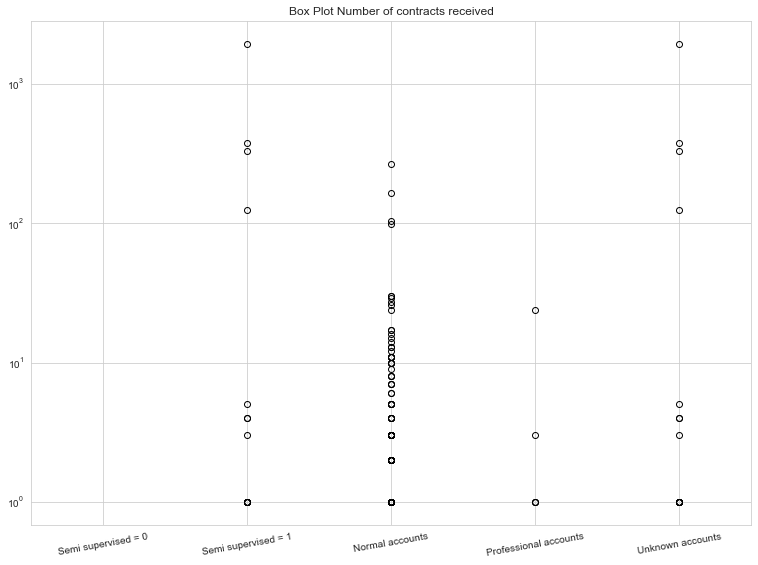

In [42]:
data0 = unknow_accounts[unknow_accounts.labels_semi_supervised == 0].n_contracts_received
data1 = unknow_accounts[unknow_accounts.labels_semi_supervised == 1].n_contracts_received
data2 = dataset[dataset.my_labels == 0].n_contracts_received
data3 = dataset[dataset.my_labels == 1].n_contracts_received
data4 = dataset[dataset.my_labels == -1].n_contracts_received


dados = [data0, data1, data2, data3, data4]

fig = plt.figure(figsize =(10, 7))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
 
# Creating plot
bp = ax.boxplot(dados)
ax.set_yscale("log")
plt.title("Box Plot Number of contracts received")
plt.xticks([1, 2, 3, 4, 5], ["Semi supervised = 0", "Semi supervised = 1", "Normal accounts", "Professional accounts", "Unknown accounts"], rotation=10)
 
# show plot
plt.show()